In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

import uproot

import histlite as hl

import scipy.interpolate as interp

from scipy.optimize import curve_fit


plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)

/cvmfs/lz.opensciencegrid.org/external/Python/3.8.2/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
replayed_data_dir = '/global/cfs/cdirs/lux/users/haselsco/TUNL_August_2021_Data/replayed/slurm_run30235/'

replay_period = 12800. # ns, period used in replay processing of the data
escale_pmt = 0.6219 # keV/PH, from Ba-133 cal fit
escale_sipm = 0.1868 # keV/PH, from Ba-133 cal fit

rootfiles = [filename for filename in os.listdir(replayed_data_dir) if filename.endswith('.root')]
print(rootfiles[:100])

['run30235_61.root', 'run30235_168.root', 'run30235_146.root', 'run30235_77.root', 'run30235_120.root', 'run30235_79.root', 'run30235_43.root', 'run30235_196.root', 'run30235_49.root', 'run30235_99.root', 'run30235_172.root', 'run30235_201.root', 'run30235_40.root', 'run30235_169.root', 'run30235_173.root', 'run30235_17.root', 'run30235_193.root', 'run30235_86.root', 'run30235_194.root', 'run30235_42.root', 'run30235_41.root', 'run30235_64.root', 'run30235_155.root', 'run30235_211.root', 'run30235_116.root', 'run30235_207.root', 'run30235_4.root', 'run30235_178.root', 'run30235_187.root', 'run30235_160.root', 'run30235_156.root', 'run30235_90.root', 'run30235_222.root', 'run30235_179.root', 'run30235_199.root', 'run30235_81.root', 'run30235_95.root', 'run30235_106.root', 'run30235_220.root', 'run30235_55.root', 'run30235_100.root', 'run30235_219.root', 'run30235_184.root', 'run30235_221.root', 'run30235_14.root', 'run30235_69.root', 'run30235_163.root', 'run30235_123.root', 'run30235_8

In [4]:
data_list_gamma = []
data_list_ndet = []
data_list_coin = []

n_open = 50

print('{} files found.'.format(len(rootfiles)))
print('only opening {} of these...'.format(n_open))
for i,thisfile in enumerate(rootfiles[:n_open]):
    if i % 10 == 0:
        print('Opening {} of {}'.format(i,len(rootfiles)))
    
    fullpath = replayed_data_dir + thisfile
    
    data_list_gamma.append( uproot.open(fullpath)['gamma_events'].arrays( ["*"], outputtype=pd.DataFrame ) )
    #data_list_ndet.append( uproot.open(fullpath)['ndet_events'].arrays( ["*"], outputtype=pd.DataFrame ) )
    data_list_coin.append( uproot.open(fullpath)['ndet_coin_events'].arrays( ["*"], outputtype=pd.DataFrame ) )
    
    


223 files found.
only opening 50 of these...
Opening 0 of 223
Opening 10 of 223
Opening 20 of 223
Opening 30 of 223
Opening 40 of 223


In [13]:
gdata = pd.concat(data_list_gamma,ignore_index=True)
#ndata = pd.concat(data_list_ndet,ignore_index=True)
cdata = pd.concat(data_list_coin,ignore_index=True)

cdata.head(10)

,ndet_ch_coin,gamma_ch_coin,ndet_PH_coin,gamma_PH_coin,ndet_E_coin,ndet_ts_coin,gamma_ts_coin,ndet_tof_coin,gamma_tof_coin,ndet_PSD_coin,ndet_PSD_cut_coin,ndet_del_time_coin,ndet_true_time_coin,gamma_true_time_coin,ndet_flash_coin,gamma_flash_coin,gamma_t10_coin,gamma_t25_coin,gamma_t50_coin,gamma_t90_coin
0,30.0,30.0,1251.550000,1251.550000,0.0,6.784895e+11,6.784895e+11,10466.858951,10466.858951,8.0,0.0,0.000000,10466.858951,10466.858951,0.0,0.0,120.0,212.0,375.0,455.0
1,27.0,27.0,522.733333,522.733333,0.0,6.784895e+11,6.784895e+11,11566.517642,11566.517642,8.0,0.0,0.000000,11566.517642,11566.517642,0.0,0.0,144.0,213.0,308.0,463.0
2,27.0,30.0,1132.575000,2720.116667,0.0,6.784895e+11,6.784895e+11,2770.173553,2470.969207,8.0,0.0,-101.897705,2770.173553,2470.969207,0.0,0.0,100.0,263.0,340.0,470.0
3,27.0,27.0,1132.575000,1132.575000,0.0,6.784895e+11,6.784895e+11,2770.173553,2770.173553,8.0,0.0,0.000000,2770.173553,2770.173553,0.0,0.0,100.0,263.0,340.0,470.0
4,30.0,27.0,2916.975000,387.658333,0.0,6.784895e+11,6.784895e+11,3786.915984,3477.486297,8.0,0.0,-307.289917,3786.915984,3477.486297,0.0,0.0,7.0,212.0,414.0,444.0
5,30.0,30.0,2916.975000,2916.975000,0.0,6.784895e+11,6.784895e+11,3786.915984,3786.915984,8.0,0.0,0.000000,3786.915984,3786.915984,0.0,0.0,7.0,212.0,414.0,444.0
6,30.0,27.0,515.841667,149.383333,0.0,6.784895e+11,6.784895e+11,6273.950774,6711.223479,8.0,0.0,-100.639771,6273.950774,6711.223479,0.0,0.0,131.0,190.0,248.0,316.0
7,30.0,30.0,515.841667,515.841667,0.0,6.784895e+11,6.784895e+11,6273.950774,6273.950774,8.0,0.0,0.000000,6273.950774,6273.950774,0.0,0.0,131.0,190.0,248.0,316.0
8,27.0,30.0,146.808333,134.983333,0.0,6.784895e+11,6.784895e+11,9387.967742,10774.579558,8.0,0.0,-129.521851,9387.967742,10774.579558,0.0,0.0,110.0,154.0,248.0,391.0
9,27.0,27.0,146.808333,146.808333,0.0,6.784895e+11,6.784895e+11,9387.967742,9387.967742,8.0,0.0,0.000000,9387.967742,9387.967742,0.0,0.0,110.0,154.0,248.0,391.0


In [6]:
gmask_pmt = gdata['gamma_ch'] == 27

cmask_pmt = cdata['gamma_ch_coin'] == 27

gdata_pmt = gdata.loc[gmask_pmt]

cdata_pmt = cdata.loc[cmask_pmt]

cdata_pmt.head()


,ndet_ch_coin,gamma_ch_coin,ndet_PH_coin,gamma_PH_coin,ndet_E_coin,ndet_ts_coin,gamma_ts_coin,ndet_tof_coin,gamma_tof_coin,ndet_PSD_coin,ndet_PSD_cut_coin,ndet_del_time_coin,ndet_true_time_coin,gamma_true_time_coin,ndet_flash_coin,gamma_flash_coin,gamma_t10_coin,gamma_t25_coin,gamma_t50_coin,gamma_t90_coin
1,27.0,27.0,522.733333,522.733333,0.0,6.784895e+11,6.784895e+11,11566.517642,11566.517642,8.0,0.0,0.000000,11566.517642,11566.517642,0.0,0.0,144.0,213.0,308.0,463.0
3,27.0,27.0,1132.575000,1132.575000,0.0,6.784895e+11,6.784895e+11,2770.173553,2770.173553,8.0,0.0,0.000000,2770.173553,2770.173553,0.0,0.0,100.0,263.0,340.0,470.0
4,30.0,27.0,2916.975000,387.658333,0.0,6.784895e+11,6.784895e+11,3786.915984,3477.486297,8.0,0.0,-307.289917,3786.915984,3477.486297,0.0,0.0,7.0,212.0,414.0,444.0
6,30.0,27.0,515.841667,149.383333,0.0,6.784895e+11,6.784895e+11,6273.950774,6711.223479,8.0,0.0,-100.639771,6273.950774,6711.223479,0.0,0.0,131.0,190.0,248.0,316.0
9,27.0,27.0,146.808333,146.808333,0.0,6.784895e+11,6.784895e+11,9387.967742,9387.967742,8.0,0.0,0.000000,9387.967742,9387.967742,0.0,0.0,110.0,154.0,248.0,391.0


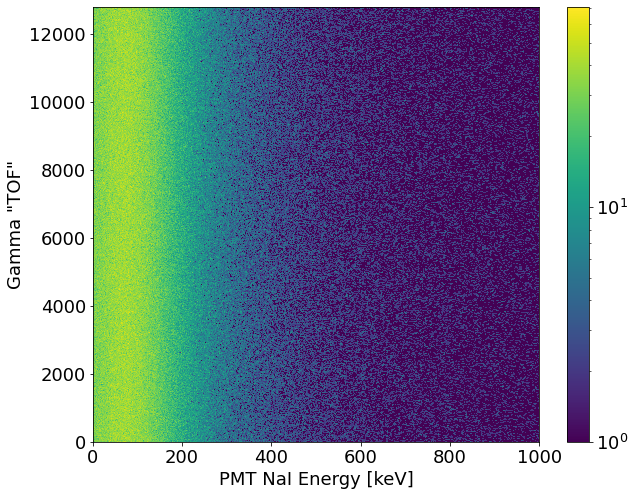

In [7]:
from matplotlib import colors

plt.hist2d( gdata_pmt['gamma_PH'] * escale_pmt,\
                 gdata_pmt['gamma_tof'], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,replay_period,3200)],\
                            norm=colors.LogNorm() )
plt.xlabel('PMT NaI Energy [keV]')
plt.ylabel('Gamma \"TOF\"')
plt.xlim(0.,1000.)
plt.colorbar()

Text(0, 0.5, 'Events')

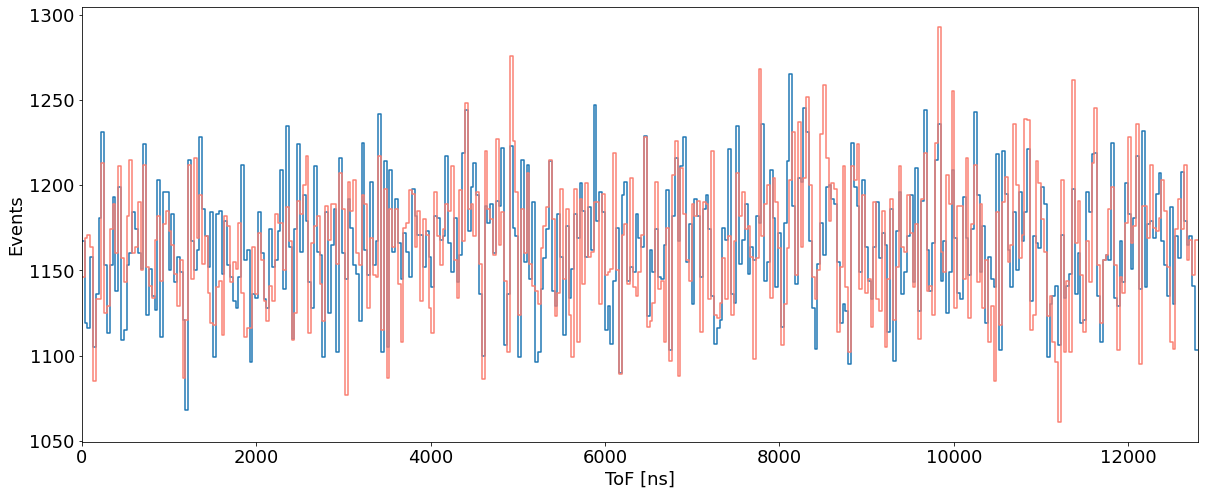

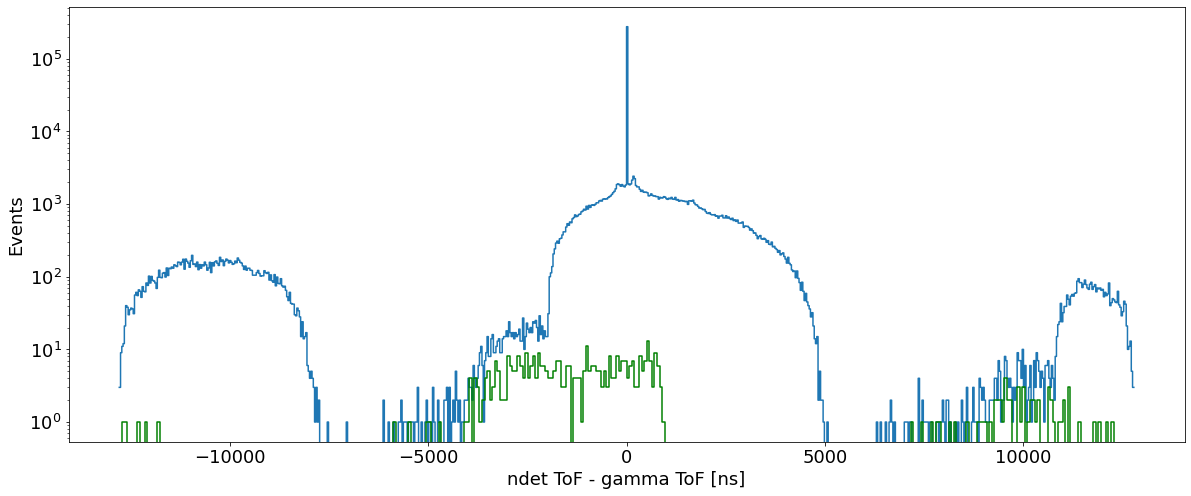

In [40]:
mask = (cdata_pmt['gamma_t25_coin']>75.)&(cdata_pmt['gamma_t25_coin']<100.)&\
        (cdata_pmt['gamma_t50_coin'] - cdata_pmt['gamma_t10_coin']>15)&\
        (cdata_pmt['gamma_t50_coin'] - cdata_pmt['gamma_t10_coin']<55)

ndet_mask = (cdata_pmt['ndet_ch_coin']==0) | (cdata_pmt['ndet_ch_coin']==1) | (cdata_pmt['ndet_ch_coin']==2)

fig1, ax1 = plt.subplots(1, figsize=(20,8))
h_gtof = hl.hist(cdata_pmt['gamma_tof_coin'].loc[mask], bins=np.linspace(0.,replay_period,400))
h_ntof = hl.hist(cdata_pmt['ndet_tof_coin'].loc[mask], bins=np.linspace(0.,replay_period,400))
hl.plot1d(ax1, h_gtof)
hl.plot1d(ax1, h_ntof,color='salmon')
plt.xlabel('ToF [ns]')
plt.ylabel('Events')
plt.xlim(0.,replay_period)

fig2, ax2 = plt.subplots(figsize=(20,8))
h_tof_diff = hl.hist( cdata_pmt['ndet_tof_coin'].loc[mask]-cdata_pmt['gamma_tof_coin'].loc[mask] , bins=800, range=(-12800,12800))
h_tof_diff2 = hl.hist( cdata_pmt['ndet_tof_coin'].loc[mask].loc[ndet_mask]-cdata_pmt['gamma_tof_coin'].loc[mask].loc[ndet_mask] , bins=400, range=(-12800,12800))
hl.plot1d(ax2,h_tof_diff)
hl.plot1d(ax2,h_tof_diff2,color='g')
plt.yscale('log')
plt.xlabel('ndet ToF - gamma ToF [ns]')
plt.ylabel('Events')
#plt.xlim(-5000.,5000)


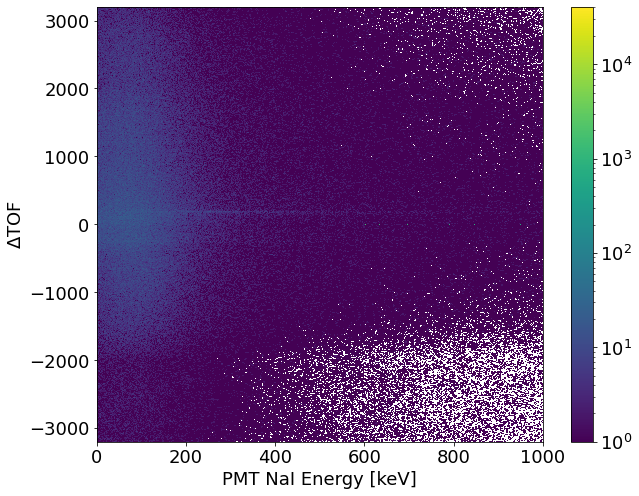

In [10]:
from matplotlib import colors

plt.hist2d( cdata_pmt['gamma_PH_coin'] * escale_pmt,\
                 np.fmod(cdata_pmt['ndet_tof_coin']-cdata_pmt['gamma_tof_coin'],3200), \
               bins=[np.linspace(0.,1000.,1000),np.linspace(-3200,3200,3200)],\
                            norm=colors.LogNorm() )
plt.xlabel('PMT NaI Energy [keV]')
plt.ylabel(r'$\Delta$TOF')
plt.xlim(0.,1000.)
plt.colorbar()

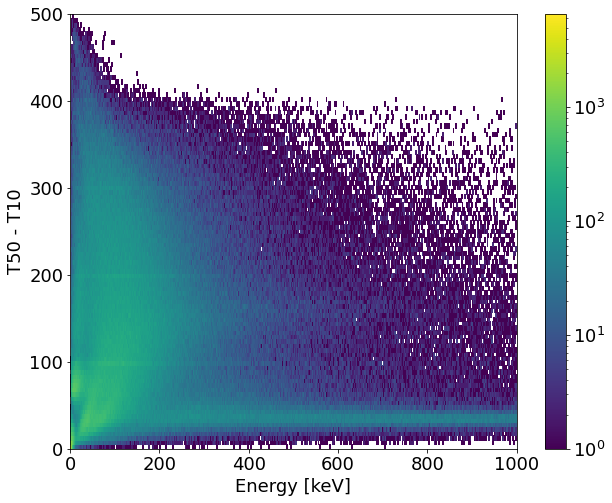

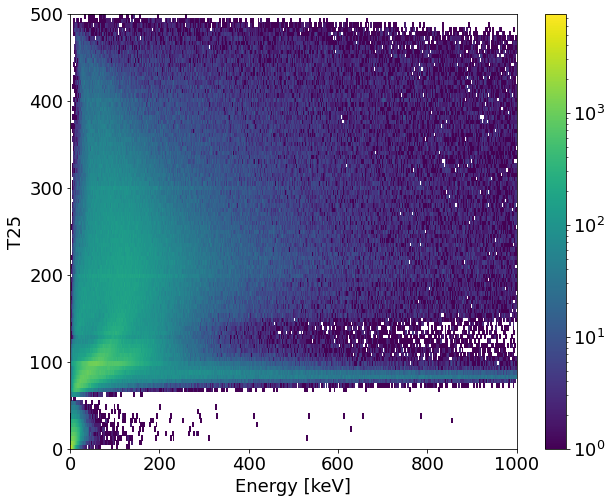

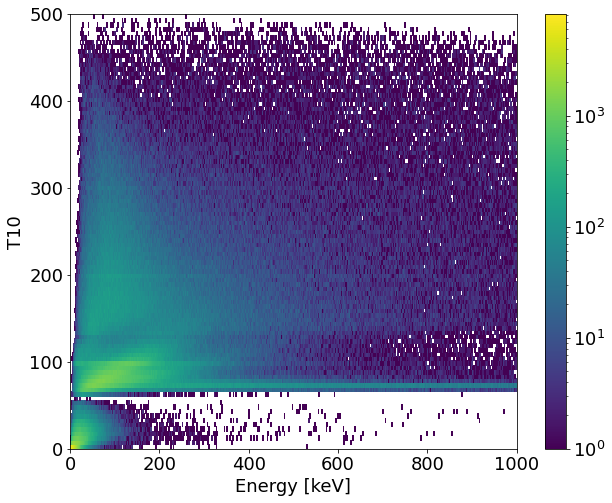

In [18]:
#mask = (data_pmt['gamma_tof']>2000.)&(data_pmt['gamma_tof']<10000.)

plt.hist2d( gdata_pmt['gamma_PH'] * escale_pmt,\
                 gdata_pmt['gamma_t50'] - gdata_pmt['gamma_t10'], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,500,100)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('T50 - T10')
plt.xlim(0.,1000.)
#plt.ylim(0.,200.)
plt.colorbar()

plt.figure(2)
#mask = (data_pmt['gamma_tof']>2000.)&(data_pmt['gamma_tof']<10000.)

plt.hist2d( gdata_pmt['gamma_PH'] * escale_pmt,\
                 gdata_pmt['gamma_t25'], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,500,100)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('T25')
plt.xlim(0.,1000.)
plt.colorbar()

plt.figure(3)
#mask = (data_pmt['gamma_tof']>2000.)&(data_pmt['gamma_tof']<10000.)

plt.hist2d( gdata_pmt['gamma_PH'] * escale_pmt,\
                 gdata_pmt['gamma_t10'], \
               bins=[np.linspace(0.,1000.,500),np.linspace(0.,500,100)],\
                            norm=colors.LogNorm() )
plt.xlabel('Energy [keV]')
plt.ylabel('T10')
plt.xlim(0.,1000.)
plt.colorbar()


(0.0, 3200.0)

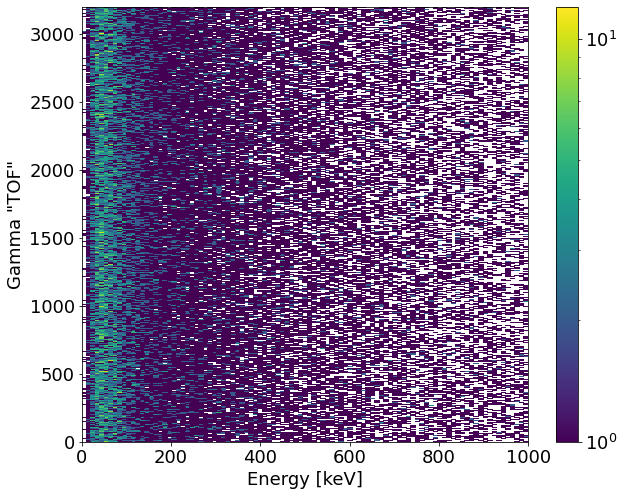

In [ ]:
mask = (gdata_pmt['gamma_t25']>75.)&(gdata_pmt['gamma_t25']<100.)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']>15)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']<55)

plt.hist2d( data_pmt['gamma_PH'].loc[mask] * escale_pmt,\
                 np.fmod(data_pmt['gamma_tof'].loc[mask]+400,3200.), \
               bins=[np.linspace(0.,1000.,100),np.linspace(0.,3200,3200)],\
                            norm=colors.LogNorm() )

TOFdata = np.fmod(data_pmt['gamma_tof']+400,3200.)

plt.xlabel('Energy [keV]')
plt.ylabel('Gamma \"TOF\"')
plt.xlim(0.,1000.)
plt.colorbar()
           
plt.ylim(0.,3200.)

(0.0, 200.0)

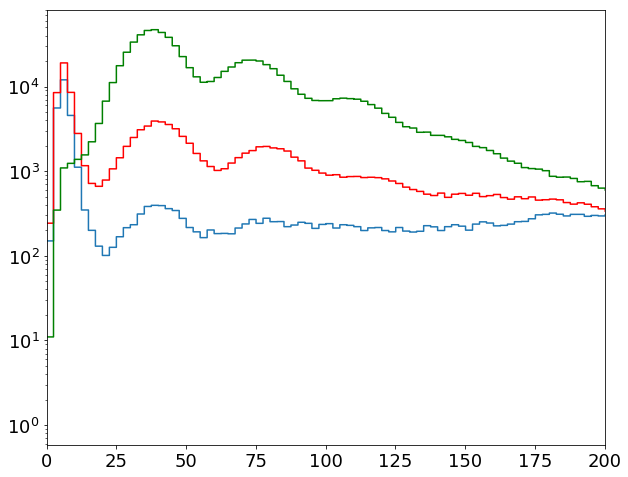

In [69]:
thismask = (data_pmt['gamma_t25']>75.)&(data_pmt['gamma_t25']<100.)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']>15)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']<55)&\
        (TOFdata>1800.)&(TOFdata<2400.)
    
h_delayed_energy = hl.hist(data_pmt['gamma_PH'].loc[thismask]*escale_pmt, bins=np.linspace(0.,2000.,800))

hl.plot1d(h_delayed_energy)

plt.yscale('log')





thismask = (data_pmt['gamma_t25']>75.)&(data_pmt['gamma_t25']<100.)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']>15)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']<55)&\
        (TOFdata>1000.)&(TOFdata<1500.)
    
h_delayed_energy2 = hl.hist(data_pmt['gamma_PH'].loc[thismask]*escale_pmt, bins=np.linspace(0.,2000.,800))

hl.plot1d(h_delayed_energy2,color='r')

plt.yscale('log')





thismask = (data_pmt['gamma_t25']>75.)&(data_pmt['gamma_t25']<100.)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']>15)&\
        (data_pmt['gamma_t50'] - data_pmt['gamma_t10']<55)&\
        (TOFdata>80.)&(TOFdata<100.)
    
h_prompt_energy = hl.hist(data_pmt['gamma_PH'].loc[thismask]*escale_pmt, bins=np.linspace(0.,2000.,800))

hl.plot1d(h_prompt_energy,color='g')

plt.yscale('log')

plt.xlim(0.,200.)




In [39]:
for i, evt in cdata.iterrows():
    print(evt['ndet_ts_coin'], evt['gamma_ts_coin'], evt['ndet_ts_coin']-evt['gamma_ts_coin'])
    if i>10:
        break

678489471288.1356 678489471288.1356 0.0
678489471907.1128 678489471907.1128 0.0
678489475024.5714 678489474922.6737 101.897705078125
678489475024.5714 678489475024.5714 0.0
678489477796.3488 678489477489.0588 307.2899169921875
678489477796.3488 678489477796.3488 0.0
678489480286.2074 678489480185.5676 100.6397705078125
678489480286.2074 678489480286.2074 0.0
678489483012.7218 678489482883.2 129.5218505859375
678489483012.7218 678489483012.7218 0.0
678489488767.0416 678489485617.4 3149.6416015625
678489488767.0416 678489485951.0038 2816.037841796875


(25.0, 40.0)

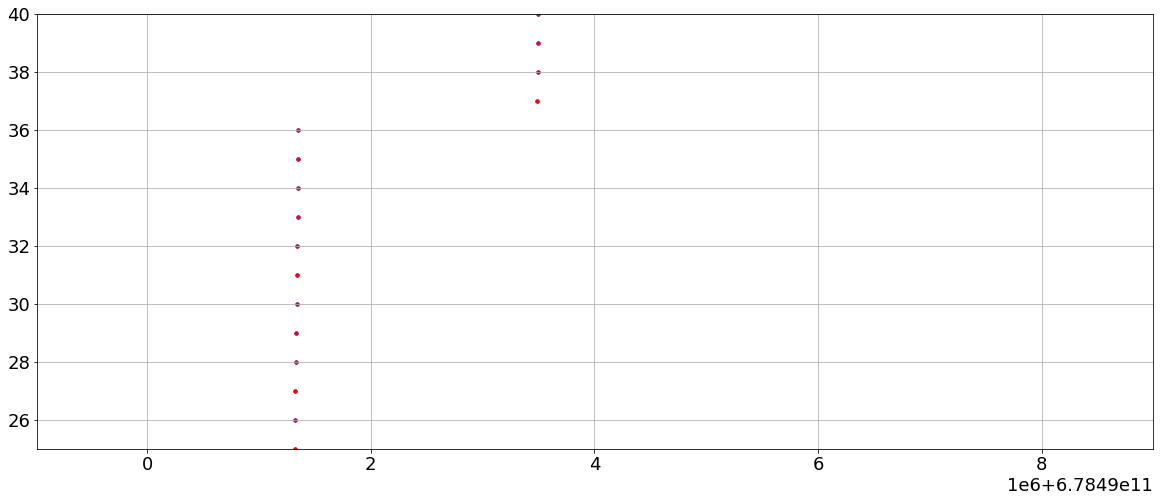

In [38]:
plt.figure(1,figsize=(20,8))
plt.scatter( cdata_pmt.head(100)['ndet_ts_coin'], range(100), s=10, color='blue')
plt.scatter( cdata_pmt.head(100)['gamma_ts_coin'], range(100), s=10, color='red')
plt.grid()
plt.ylim(25,40)

In [18]:
cdata_pmt.head(100)['ndet_ts_coin'].to_numpy()

array([6.78489472e+11, 6.78489475e+11, 6.78489478e+11, 6.78489480e+11,
       6.78489483e+11, 6.78489489e+11, 6.78489489e+11, 6.78489638e+11,
       6.78489641e+11, 6.78489644e+11, 6.78489647e+11, 6.78489648e+11,
       6.78489651e+11, 6.78489657e+11, 6.78489657e+11, 6.78490136e+11,
       6.78490140e+11, 6.78490143e+11, 6.78490146e+11, 6.78490149e+11,
       6.78490152e+11, 6.78490155e+11, 6.78491313e+11, 6.78491316e+11,
       6.78491318e+11, 6.78491321e+11, 6.78491323e+11, 6.78491326e+11,
       6.78491331e+11, 6.78491335e+11, 6.78491337e+11, 6.78491341e+11,
       6.78491343e+11, 6.78491346e+11, 6.78491348e+11, 6.78491354e+11,
       6.78491354e+11, 6.78493489e+11, 6.78493494e+11, 6.78493496e+11,
       6.78493500e+11, 6.78493502e+11, 6.78493505e+11, 6.78493509e+11,
       6.78494309e+11, 6.78494311e+11, 6.78494314e+11, 6.78494318e+11,
       6.78494320e+11, 6.78494323e+11, 6.78494328e+11, 6.78494716e+11,
       6.78494719e+11, 6.78494722e+11, 6.78494726e+11, 6.78494728e+11,
      

In [41]:
import pickle

datalist = []

for i in range(30):
    filename = replayed_data_dir + 'run30235_{}_nai_pmt_waveforms.pkl'.format(i)
    with open( filename ,'rb') as pklfile:
        datalist.extend(pickle.load(pklfile))
    
datadf = pd.DataFrame(datalist)


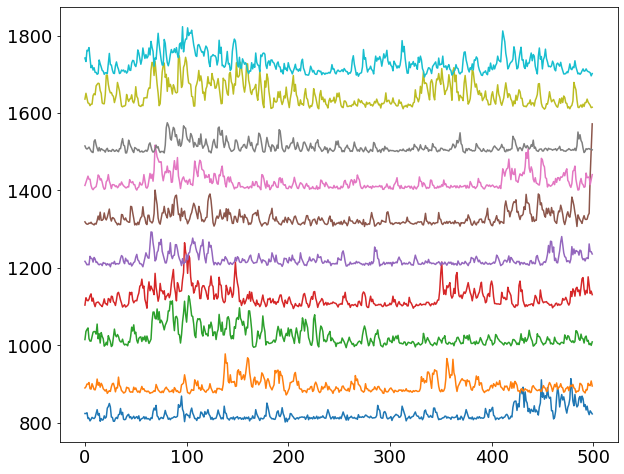

In [42]:
mask = (datadf['t50'] - datadf['t10']>15)&\
        (datadf['t50'] - datadf['t10']<55)&\
        (datadf['peakhigh_reported']* escale_pmt < 50)&\
        (datadf['peakhigh_reported']* escale_pmt > 30)
        

dfmask = datadf.loc[mask]

for i in range(10):
    try:
        plt.plot(dfmask['samples'].iloc[i] + 100*i)
    except IndexError:
        break

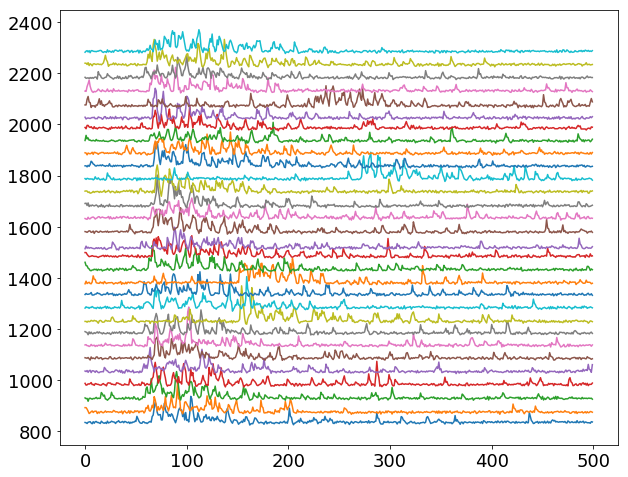

In [79]:
mask = (datadf['t50'] - datadf['t10']>15)&\
        (datadf['t50'] - datadf['t10']<55)&\
         (datadf['peakhigh_reported']* 0.6219 > 20)&\
         (datadf['peakhigh_reported']* 0.6219 < 50)
        

dfmask = datadf.loc[mask]

for i in range(30):
    try:
        plt.plot(dfmask['samples'].iloc[i] + 50*i)
    except IndexError:
        break

In [ ]:
mask = (datadf['t25']>75.)&(datadf['t25']<100.)&\
        (datadf['t50'] - datadf['t10']>75)&\
        (datadf['t50'] - datadf['t10']<125)&\
        (datadf['peakhigh_reported']* 0.6219 < 50)&\
        (datadf['peakhigh_reported']* 0.6219 > 30)
        

dfmask = datadf.loc[mask]

for i in range(10):
    try:
        plt.plot(dfmask['samples'].iloc[i] + 100*i)
    except IndexError:
        break